In [1]:
#Gaberial Campese
#DATS 6202
#Assignment #1

In [2]:
from sklearn.datasets import load_breast_cancer #load dataset and libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd #load pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#Preprocessing
breast_cancer_data = load_breast_cancer()
breast_cancer_data.keys() 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
breast = pd.DataFrame(np.c_[breast_cancer_data['data'], breast_cancer_data['target']],
                  columns= np.append(breast_cancer_data['feature_names'], ['target']))

In [6]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f2bbac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114bea320>]], dtype=object)

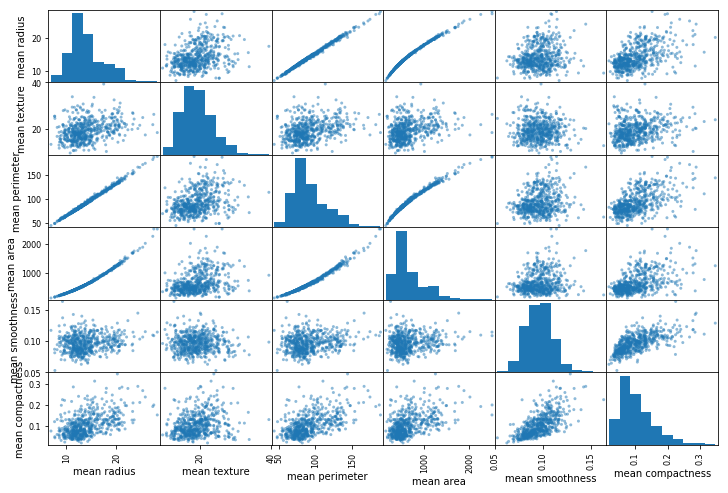

In [9]:
#Pairwise for select number of features and target
from pandas.plotting import scatter_matrix

features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness",
           ]
scatter_matrix(breast[features], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fd96860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2d30cf28>]], dtype=object)

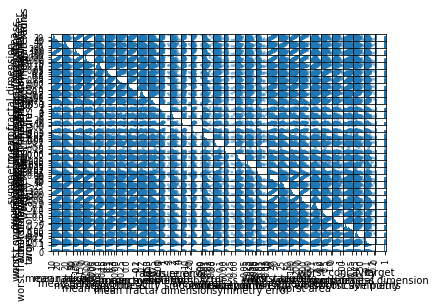

In [30]:
pd.plotting.scatter_matrix(breast) #pairwise for all, not very appealing

In [128]:
#Pipeline
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
breast_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('std_scaler', StandardScaler()),
])
b_pipeline = breast_pipeline.fit_transform(breast)

In [129]:
b_pipeline #show pipeline

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

In [130]:
#Classification with KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, 
                                                   stratify=breast_cancer_data.target, random_state=42)
knn3 = KNeighborsClassifier(3) #defaults to 5, let's start with 3
knn3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [131]:
knntrain3 = knn3.score(X_train,y_train) #train accuracy for 3 neighbors
knntrain3

0.95070422535211263

In [132]:
knntest3 = knn3.score(X_test,y_test) #test accuracy for 3 neighbors
knntest3

0.93006993006993011

In [133]:
knn4 = KNeighborsClassifier(4) #4 neighbors
knn4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [134]:
knntrain4 = knn4.score(X_train,y_train) #train accuracy for 4 neighbors
knntrain4

0.9460093896713615

In [135]:
knntest4 = knn4.score(X_test,y_test) #test accuracy for 4 neighbors
knntest4

0.91608391608391604

In [136]:
knn5 = KNeighborsClassifier() #defaults to 5
knn5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
knntrain5 = knn5.score(X_train,y_train) #train accuracy for 5 neighbors
knntrain5

0.9460093896713615

In [138]:
knntest5 = knn5.score(X_test,y_test) #test accuracy for 5 neighbors
knntest5

0.93006993006993011

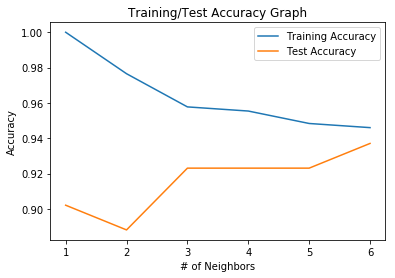

In [169]:
#Training/Test Accuracy Graph

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target,
                                                    stratify=breast_cancer_data.target, random_state=66)
train_acc = []
test_acc = []
neighbors = range(1,7) #range of neighbors

for n_neighbors in neighbors:
    knnplt = KNeighborsClassifier(n_neighbors = n_neighbors)
    knnplt.fit(X_train, y_train)
    train_acc.append(knnplt.score(X_train,y_train))
    test_acc.append(knnplt.score(X_test,y_test))
    
plt.plot(neighbors, train_acc, label = "Training Accuracy")
plt.plot(neighbors, test_acc, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("# of Neighbors")
plt.title("Training/Test Accuracy Graph")
plt.legend()
plt.show()